<a href="https://colab.research.google.com/github/mariya-kislicyna/MMDA/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22k_means_(3)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment А3. Cluster analysis and cluster interpretation

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.cluster import KMeans


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/winequality-red.csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
subdata=data[["residual sugar", "density", "pH", "alcohol" , "quality"]]
subdata=(subdata-np.mean(subdata))/(np.max(subdata)-np.min(subdata)) #standardisation
subdata

,residual sugar,density,pH,alcohol,quality
0,-0.043754,0.077336,0.156604,-0.157382,-0.127205
1,0.004191,0.003915,-0.087491,-0.095844,-0.127205
2,-0.016357,0.018599,-0.040247,-0.095844,-0.127205
3,-0.043754,0.092021,-0.118987,-0.095844,0.072795
4,-0.043754,0.077336,0.156604,-0.157382,-0.127205
...,...,...,...,...,...
1594,-0.036904,-0.135586,0.109360,0.011849,-0.127205
1595,-0.023206,-0.119433,0.164478,0.119541,0.072795
1596,-0.016357,-0.073912,0.085738,0.088772,0.072795
1597,-0.036904,-0.093736,0.203848,-0.034305,-0.127205


In [22]:
best = KMeans(n_clusters=5, n_init=1)
best.fit(subdata)
for i in range(10000):
  model = KMeans(n_clusters=5, n_init=1)
  model.fit(subdata)
  if model.inertia_<best.inertia_:
    best = model
best.inertia_

71.6281781438446

In [23]:
best9 = KMeans(n_clusters=9, n_init=1)
best9.fit(subdata)
for i in range(10000):
  model = KMeans(n_clusters=9, n_init=1)
  model.fit(subdata)
  if model.inertia_<best9.inertia_:
    best9 = model
best9.inertia_

52.14252728022043

In [24]:
b5=pd.DataFrame(best.cluster_centers_, columns=subdata.columns)*100
# b5.to_excel("b5.xlsx")
b5

,residual sugar,density,pH,alcohol,quality
0,-2.154844,-2.268807,8.918109,-4.251321,-15.927447
1,-0.972542,-14.584857,4.145993,22.481842,15.146586
2,-1.429737,5.020327,-2.045244,-4.461618,10.392556
3,-1.116279,6.281024,-8.960059,-13.024645,-13.162439
4,33.825604,22.110469,-5.513342,2.338721,-1.782950


In [25]:
b9=pd.DataFrame(best9.cluster_centers_, columns=subdata.columns)*100
# b9.to_excel("b9.xlsx")
b9

,residual sugar,density,pH,alcohol,quality
0,43.411764,18.534115,-1.056763,-8.440371,-6.566604
1,-0.016023,-7.377934,10.669555,7.269317,-18.133984
2,-2.872336,1.541503,6.033847,-12.143116,-14.317673
3,-1.817132,-9.407135,3.361435,12.977555,7.194080
4,-0.875847,6.159151,-11.195942,-12.468282,-13.437296
5,1.856532,-6.101138,-3.880489,18.817595,28.828845
6,-2.600785,1.982489,2.219238,-10.213726,8.519219
7,-2.189174,-26.247687,13.289018,36.438304,13.326061
8,2.307093,18.854157,-12.226761,-0.208945,9.971857


In [26]:
d1=data.copy()
d1["c5"]=best.predict(subdata)
d1["c9"]=best9.predict(subdata)

In [27]:
d1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,x1,x2,part,c5,c9
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052,NaN,NaN,-0.031529,0.407781,0.383271
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558,NaN,NaN,0.281274,-0.049946,-0.233651
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373,NaN,NaN,-0.089536,0.283064,0.279468
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732,NaN,NaN,0.050463,0.320983,-0.143063
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907,NaN,NaN,0.107261,0.196451,-0.009074
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656,NaN,NaN,0.022514,0.073627,-0.119029
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100,NaN,NaN,0.165722,0.211709,-0.094360
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919,NaN,NaN,0.180143,0.463544,0.133836
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731,NaN,NaN,0.016248,-0.512370,-0.284501
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397,NaN,NaN,-0.158339,0.128309,0.217993


##Contingency Table

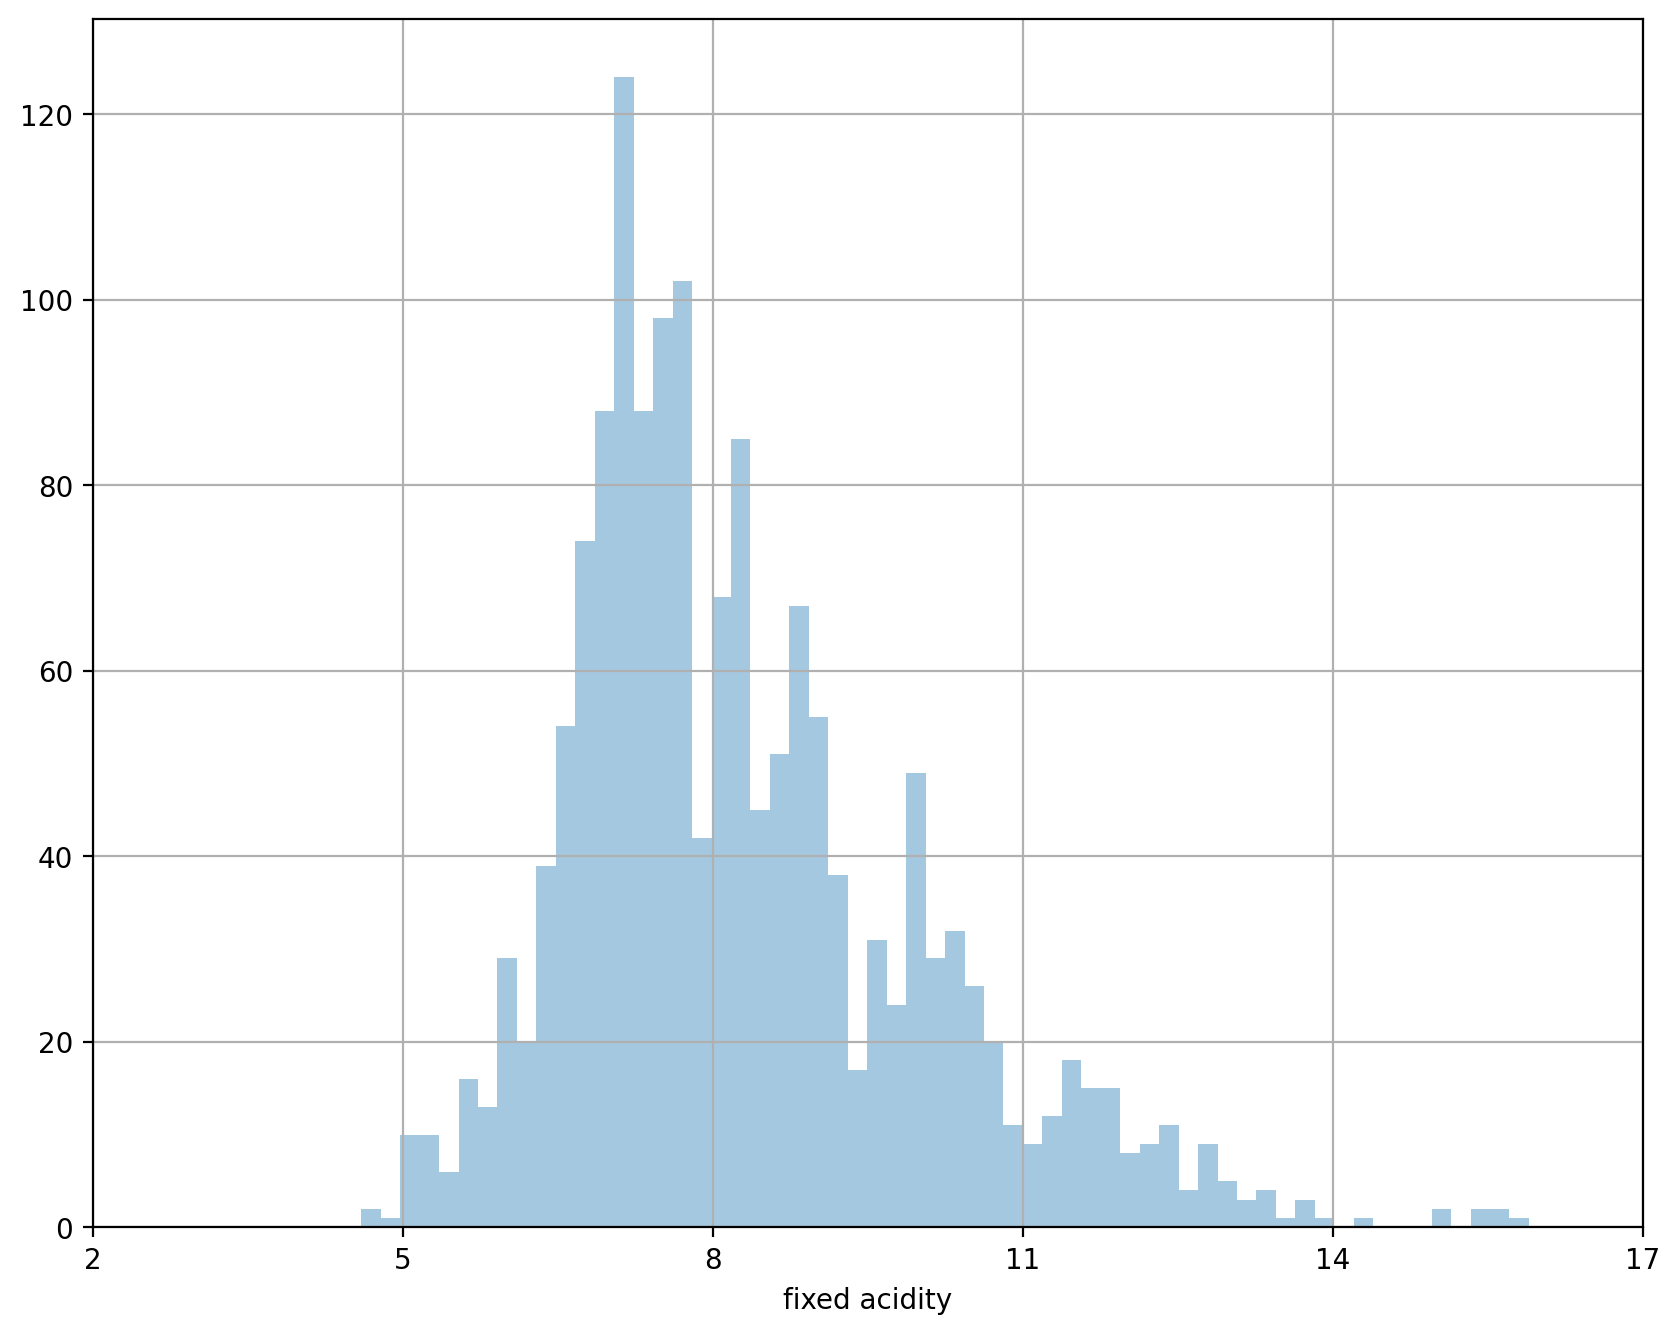

In [64]:
plt.figure(figsize = (10, 8), dpi = 200)
sns.distplot(data["fixed acidity"], bins=60, kde=False)
plt.grid()
plt.xticks(np.arange(2, 20, 3))
plt.savefig("nov1.png");

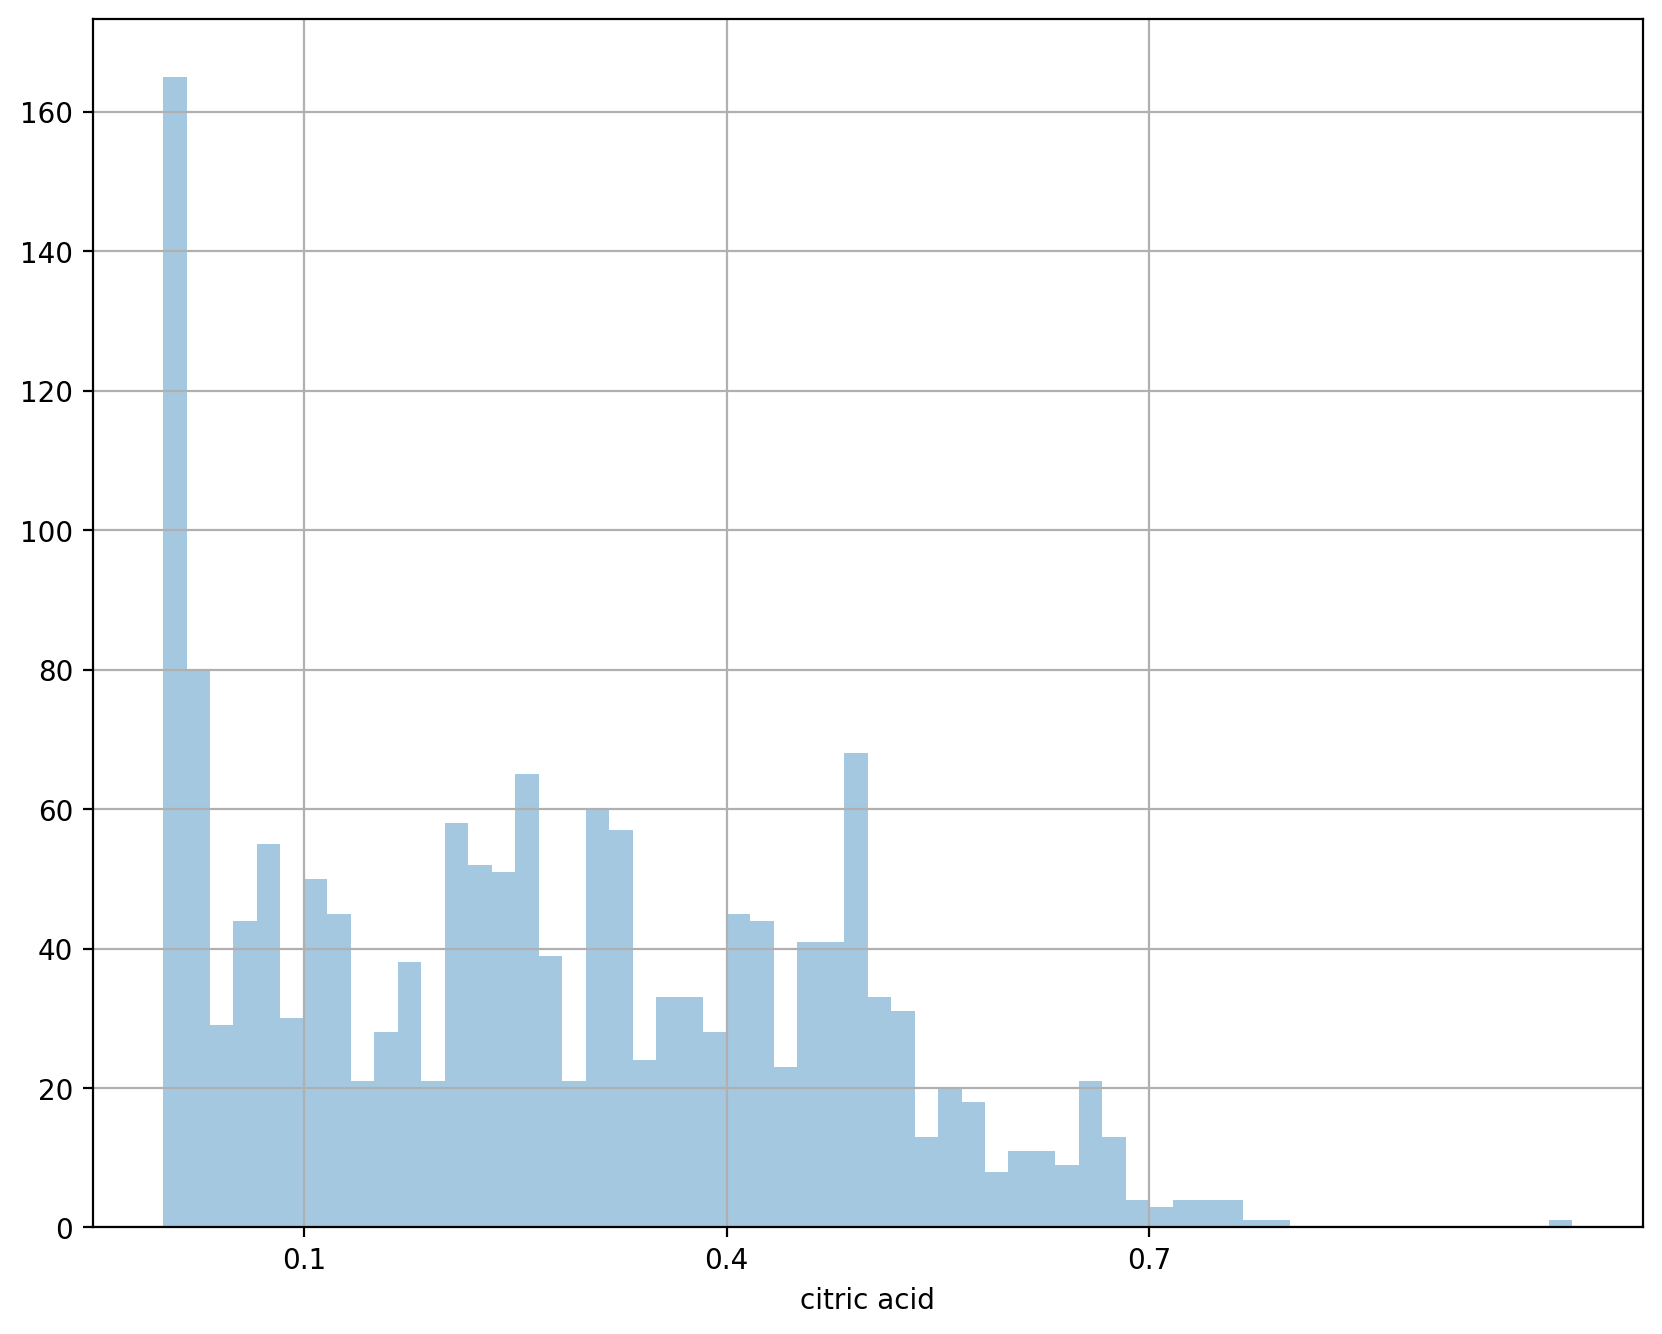

In [57]:
plt.figure(figsize = (10, 8), dpi = 200)
sns.distplot(data["citric acid"], bins=60, kde=False)
plt.grid()
plt.xticks(np.arange(0.1, 1, 0.3))
plt.savefig("nov2.png");

In [65]:
data["x1"]=data["fixed acidity"]

In [66]:
data.loc[data["fixed acidity"]<7, ["x1"]]=1
data.loc[data["fixed acidity"]>=7, ["x1"]]=2
data.loc[data["fixed acidity"]>=10, ["x1"]]=3
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,x1,x2,part
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.0,1.0,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.0,1.0,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3.0,1.0,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0,1.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0,1.0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0,1.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0,1.0,0


In [67]:
data["x2"]=data["citric acid"]

In [68]:
data.loc[data["citric acid"]<0.1, ["x2"]]=1
data.loc[data["citric acid"]>=0.1, ["x2"]]=2
data.loc[data["citric acid"]>=0.3, ["x2"]]=3
data.loc[data["citric acid"]>=0.6, ["x2"]]=4
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,x1,x2,part
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.0,1.0,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.0,1.0,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3.0,3.0,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0,1.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0,2.0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0,2.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0,2.0,0


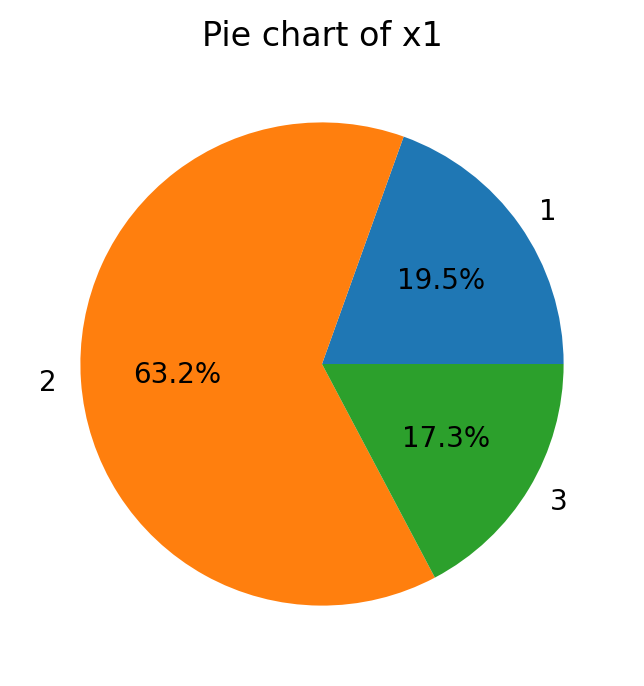

In [69]:
plt.figure(figsize = (5, 4), dpi = 200)
plt.title("Pie chart of x1")
plt.pie([len(data["x1"][data["x1"]==1]), len(data["x1"][data["x1"]==2]), 
         len(data["x1"][data["x1"]==3])], labels=["1", "2", "3"], autopct='%1.1f%%')
plt.savefig("x1.png");

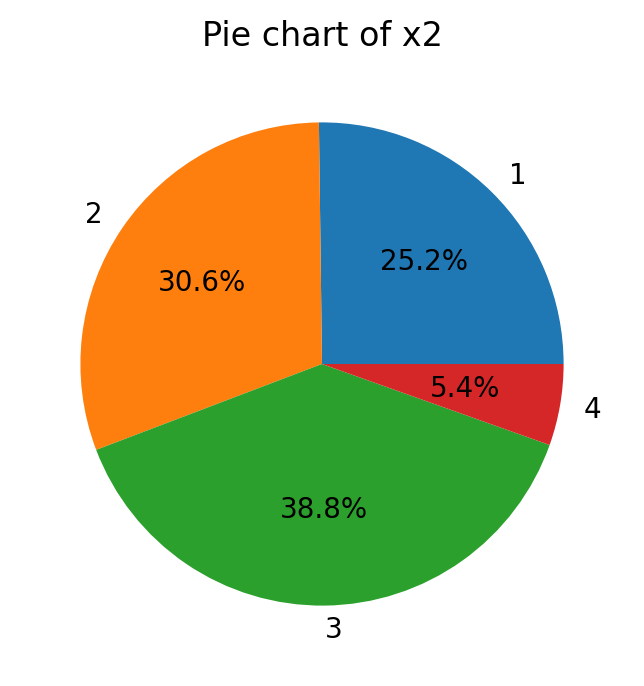

In [70]:
plt.figure(figsize = (5, 4), dpi = 200)
plt.title("Pie chart of x2")
plt.pie([len(data["x2"][data["x2"]==1]), len(data["x2"][data["x2"]==2]),
         len(data["x2"][data["x2"]==3]),
len(data["x2"][data["x2"]==4])], labels=["1", "2", "3", "4"],
autopct='%1.1f%%')
plt.savefig("x2.png");

In [71]:
data["part"]=d1["c5"]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,x1,x2,part
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,2.0,1.0,3
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2.0,1.0,3
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3.0,3.0,2
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,2.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1.0,1.0,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1.0,2.0,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1.0,2.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1.0,2.0,0


In [72]:
result1=pd.DataFrame(contingency_matrix(data["part"], data["x1"]), columns=[1, 2, 3])
result1["Total"]=[np.sum([result1[i][j] for i in result1]) for j in result1.index]
result1.loc["Total"]=[np.sum([result1[i][j] for j in result1.index]) for i in result1]
result1.to_excel("cont1.xlsx")
result1

,1,2,3,Total
0,114,224,5,343
1,130,193,38,361
2,45,293,131,469
3,8,279,75,362
4,15,22,27,64
Total,312,1011,276,1599


In [73]:
rel1=result1.copy()
rel1=rel1.divide(1005)
rel1.to_excel("rel1.xlsx")
rel1

,1,2,3,Total
0,0.113433,0.222886,0.004975,0.341294
1,0.129353,0.192040,0.037811,0.359204
2,0.044776,0.291542,0.130348,0.466667
3,0.007960,0.277612,0.074627,0.360199
4,0.014925,0.021891,0.026866,0.063682
Total,0.310448,1.005970,0.274627,1.591045


In [74]:
cond1=rel1.copy()
for i in cond1:
  for j in range(cond1.shape[0]-1):
    cond1.to_excel("cond1.xlsx")
cond1

,1,2,3,Total
0,0.113433,0.222886,0.004975,0.341294
1,0.129353,0.192040,0.037811,0.359204
2,0.044776,0.291542,0.130348,0.466667
3,0.007960,0.277612,0.074627,0.360199
4,0.014925,0.021891,0.026866,0.063682
Total,0.310448,1.005970,0.274627,1.591045


In [75]:
m1=np.dot(np.reshape(np.asarray(cond1["Total"][0:-1]), (-1, 1)), np.reshape(np. asarray(cond1.iloc[-1][0:-1]), (1, -1)))
mn1=pd.DataFrame(m1, columns=cond1.columns[:-1])
mn1["Total"]=rel1["Total"][0:-1]
mn1.loc["Total"]=rel1.iloc[-1]
mn1.to_excel("indep1.xlsx")
mn1

,1,2,3,Total
0,0.105954,0.343331,0.093728,0.341294
1,0.111514,0.361348,0.098647,0.359204
2,0.144876,0.469453,0.128159,0.466667
3,0.111823,0.362349,0.098920,0.360199
4,0.019770,0.064062,0.017489,0.063682
Total,0.310448,1.005970,0.274627,1.591045


In [77]:
q1=rel1.copy()
for i in mn1.columns[:-1]:
  for j in range(mn1.shape[0]-1):
    q1[i][j]=q1[i][j]/m1[j][i-1]-1
    q1.to_excel("q1.xlsx")
q1

,1,2,3,Total
0,0.070588,-0.350815,-0.946920,0.341294
1,0.159972,-0.468547,-0.616705,0.359204
2,-0.690934,-0.378974,0.017081,0.466667
3,-0.928814,-0.233856,-0.245586,0.360199
4,-0.245042,-0.658290,0.536175,0.063682
Total,0.310448,1.005970,0.274627,1.591045


In [78]:
(rel1.drop(["Total"], axis=1).iloc[0:-1]*q1.drop(["Total"], axis=1).iloc[0:-1]).sum().sum()

-0.401003357496188

In [79]:
chi1=(rel1-mn1)**2/mn1
chi1.to_excel("chi1.xlsx")
chi1

,1,2,3,Total
0,0.000528,0.042254,0.084042,0.0
1,0.002854,0.079329,0.037518,0.0
2,0.069162,0.067423,0.000037,0.0
3,0.096469,0.019816,0.005966,0.0
4,0.001187,0.027761,0.005028,0.0
Total,0.000000,0.000000,0.000000,0.0


In [80]:
hi1=chi1.sum().sum()
hi1

0.5393753460012504

In [81]:
stats.chi2.ppf(0.95, (chi1.shape[0]-2)*(chi1.shape[1]-2))/hi1, stats.chi2.ppf(0.99, (chi1.shape[0]-2)*(chi1.shape[1]-2))/hi1

(28.750504024389542, 37.2472252923786)

In [82]:
result2=pd.DataFrame(contingency_matrix(data["part"], data["x2"]), columns=[1, 2, 3, 4])
result2["Total"]=[np.sum([result2[i][j] for i in result2]) for j in result2.index]
result2.loc["Total"]=[np.sum([result2[i][j] for j in result2.index]) for i in result2]
result2.to_excel("cont2.xlsx")
result2

,1,2,3,4,Total
0,155,126,57,5,343
1,103,66,173,19,361
2,97,134,209,29,469
3,43,150,148,21,362
4,5,13,33,13,64
Total,403,489,620,87,1599


In [83]:
rel2=result2.copy()
rel2=rel2.divide(1005)
rel2.to_excel("rel2.xlsx")
rel2

,1,2,3,4,Total
0,0.154229,0.125373,0.056716,0.004975,0.341294
1,0.102488,0.065672,0.172139,0.018905,0.359204
2,0.096517,0.133333,0.207960,0.028856,0.466667
3,0.042786,0.149254,0.147264,0.020896,0.360199
4,0.004975,0.012935,0.032836,0.012935,0.063682
Total,0.400995,0.486567,0.616915,0.086567,1.591045


In [85]:
cond2=rel2.copy()
for i in cond2:
  for j in range(cond2.shape[0]-1):
    cond2.to_excel("cond2.xlsx")
cond2

,1,2,3,4,Total
0,0.154229,0.125373,0.056716,0.004975,0.341294
1,0.102488,0.065672,0.172139,0.018905,0.359204
2,0.096517,0.133333,0.207960,0.028856,0.466667
3,0.042786,0.149254,0.147264,0.020896,0.360199
4,0.004975,0.012935,0.032836,0.012935,0.063682
Total,0.400995,0.486567,0.616915,0.086567,1.591045


In [86]:
m2=np.dot(np.reshape(np.asarray(cond2["Total"][0:-1]), (-1, 1)), np.reshape(np. asarray(cond2.iloc[-1][0:-1]), (1, -1)))
mn2=pd.DataFrame(m2, columns=cond2.columns[:-1])
mn2["Total"]=rel2["Total"][0:-1]
mn2.loc["Total"]=rel2.iloc[-1]
mn2.to_excel("indep2.xlsx")
mn2

,1,2,3,4,Total
0,0.136857,0.166062,0.210549,0.029545,0.341294
1,0.144039,0.174777,0.221598,0.031095,0.359204
2,0.187131,0.227065,0.287894,0.040398,0.466667
3,0.144438,0.175261,0.222212,0.031181,0.360199
4,0.025536,0.030985,0.039286,0.005513,0.063682
Total,0.400995,0.486567,0.616915,0.086567,1.591045


In [88]:
q2=rel2.copy()
for i in mn2.columns[:-1]:
  for j in range(mn2.shape[0]-1):
    q2[i][j]=q2[i][j]/m2[j][i-1]-1
    q2.to_excel("q2.xlsx")
q2

,1,2,3,4,Total
0,0.126934,-0.245023,-0.730626,-0.831608,0.341294
1,-0.288474,-0.624254,-0.223193,-0.392015,0.359204
2,-0.484225,-0.412796,-0.277650,-0.285714,0.466667
3,-0.703776,-0.148392,-0.337284,-0.329872,0.360199
4,-0.805172,-0.582535,-0.164189,1.346444,0.063682
Total,0.400995,0.486567,0.616915,0.086567,1.591045


In [89]:
(rel2.drop(["Total"], axis=1).iloc[0:-1]*q2.drop(["Total"], axis=1).iloc[0:-1]).sum().sum()

-0.44920870574031646

In [90]:
chi2=(rel2-mn2)**2/mn2
chi2.to_excel("chi2.xlsx")
chi2

,1,2,3,4,Total
0,0.002205,0.009970,0.112394,0.020432,0.0
1,0.011986,0.068109,0.011039,0.004779,0.0
2,0.043877,0.038692,0.022194,0.003298,0.0
3,0.071540,0.003859,0.025279,0.003393,0.0
4,0.016555,0.010515,0.001059,0.009994,0.0
Total,0.000000,0.000000,0.000000,0.000000,0.0


In [91]:
hi2=chi2.sum().sum()
hi2

0.49116999775712167

In [92]:
stats.chi2.ppf(0.95, (chi2.shape[0]-2)*(chi1.shape[1]-2))/hi2, stats.chi2.ppf(0.99, (chi2.shape[0]-2)*(chi1.shape[1]-2))/hi2

(31.572191149048262, 40.90281393693277)

##Bootstrap

Comparison of the average in two clusters

In [93]:
mnd=list()
for i in range(5000):
  samples=data[["pH", "part"]].loc[np.random.randint(0, 1005, size=1005)]
  mnd.append(samples.loc[samples["part"]==2, ["pH"]].mean()[0]-samples.loc[samples["part"]==4, ["pH"]].mean()[0])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


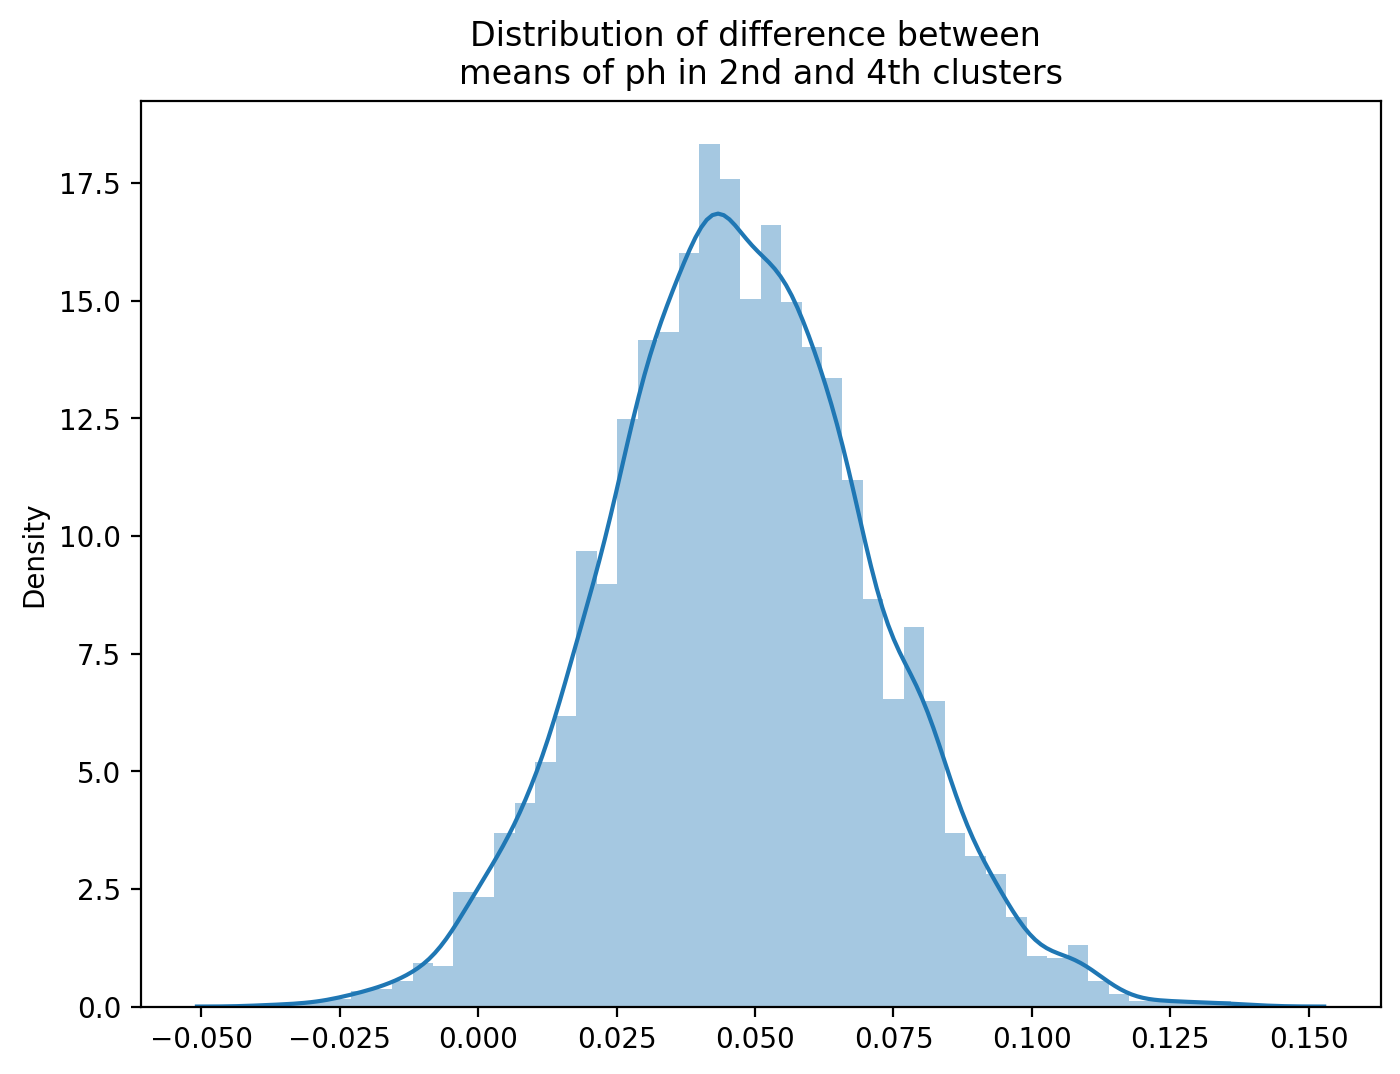

In [98]:
plt.figure(figsize = (8, 6), dpi = 200)
plt.title("Distribution of difference between \nmeans of ph in 2nd and 4th clusters")
sns.distplot(mnd)
plt.savefig("diff.png");

pivotal

In [95]:
np.mean(mnd)-np.std(mnd)*1.96, np.mean(mnd)+np.std(mnd)*1.96

(0.0003615430572365061, 0.09407080900264236)

non-pivotal

In [99]:
np.sort(mnd)[int(5000*(1-0.95)/2)],np.sort(mnd)[int(5000*(1+0.95)/2)]

(0.0009411678938548995, 0.09504942166141017)

In [103]:
data.loc[data["part"]==2,["pH"]].mean()-data.loc[data["part"]==4,["pH"]].mean()

pH    0.044045
dtype: float64

The average for all values of the feature

In [104]:
mnh=list()
for i in range(5000):
  samples= data["fixed acidity"].loc[np.random.randint(0, 1005, size=1005)]
  mnh.append(samples.mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


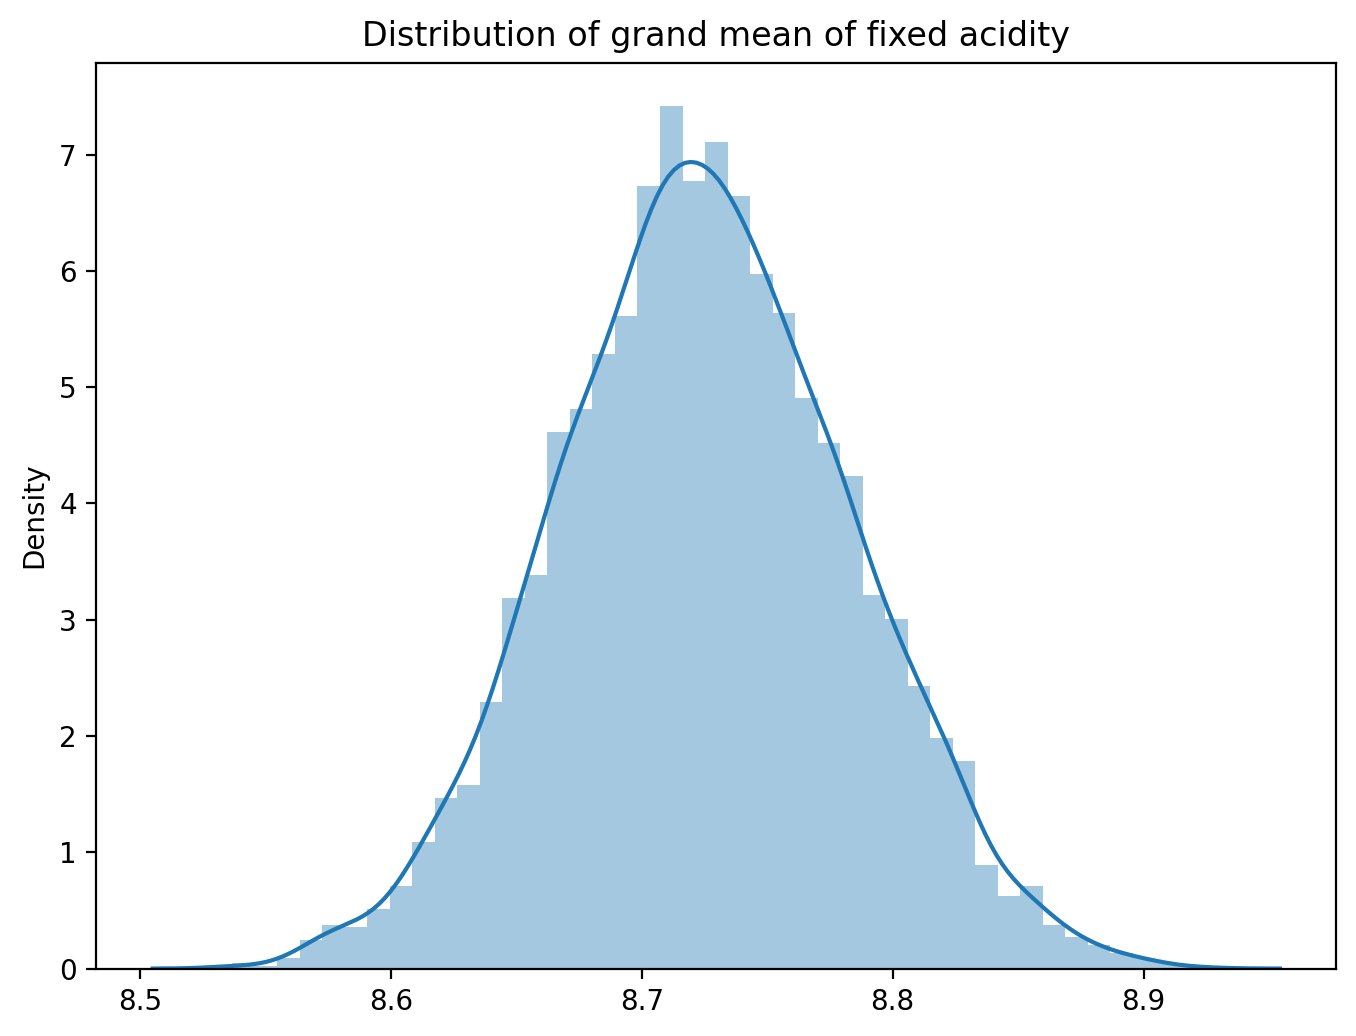

In [106]:
plt.figure(figsize = (8, 6), dpi = 200)
plt.title("Distribution of grand mean of fixed acidity")
sns.distplot(mnh)
plt.savefig("grandm.png");

In [107]:
data["fixed acidity"].mean()

8.31963727329581

In [108]:
np.mean(mnh)-np.std(mnh)*1.96, np.mean(mnh)+np.std(mnh)*1.96

(8.61135951922011, 8.83856816237193)

In [109]:
np.sort(mnh)[int(5000*(1-0.95)/2)],np.sort(mnh)[int(5000*(1+0.95)/2)]

(8.612437810945273, 8.838905472636815)

Comparison of the average in the cluster and the total

In [115]:
mng=list()
for i in range(5000):
  samples=data[["fixed acidity", "part"]].loc[np.random.randint(0, 1005, size=1005)]
  mng.append(samples.loc[samples["part"]==0, ["fixed acidity"]].mean()[0]-samples["fixed acidity"].mean())

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


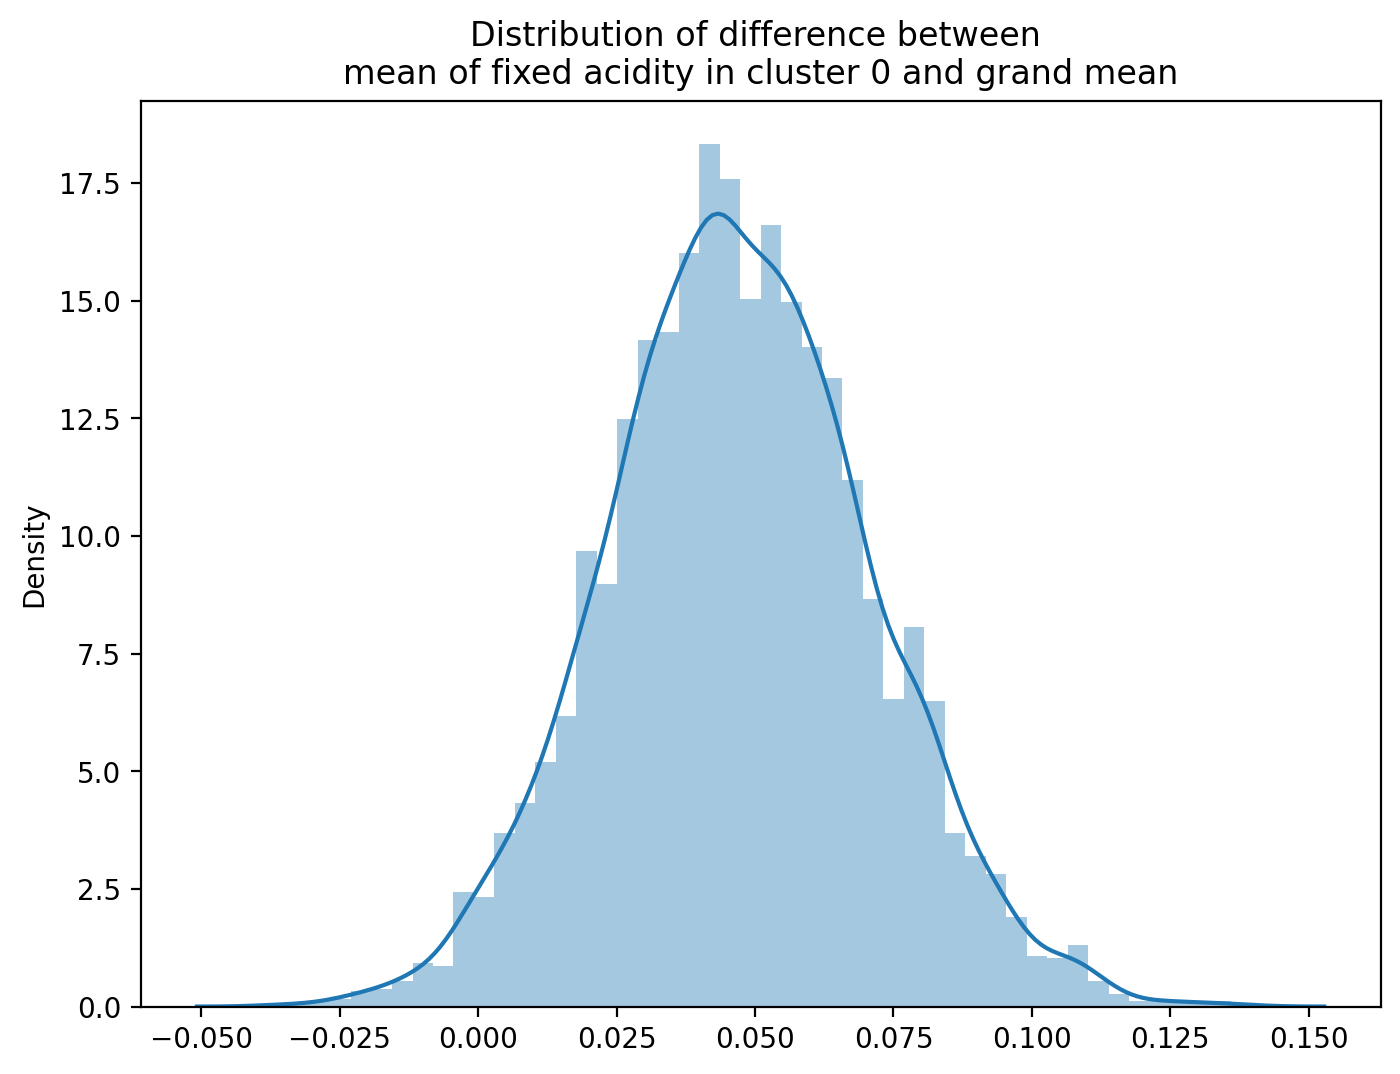

In [116]:
plt.figure(figsize = (8, 6), dpi = 200)
plt.title("Distribution of difference between \nmean of fixed acidity in cluster 0 and grand mean")
sns.distplot(mnd)
plt.savefig("diffg.png");

In [117]:
data.loc[data["part"]==0,["fixed acidity"]].mean()-data["fixed acidity"].mean()

fixed acidity   -1.00506
dtype: float64

In [118]:
np.mean(mng)-np.std(mng)*1.96, np.mean(mng)+np.std(mng)*1.96

(-1.4226419542615767, -1.1078848453695194)

In [119]:
np.sort(mng)[int(5000*(1-0.95)/2)],np.sort(mng)[int(5000*(1+0.95)/2)]

(-1.4211867491809258, -1.109954433440275)